In [22]:
import pandas as pd

# Задание 1

In [23]:
df = pd.read_csv('marketing_campaign.csv')
df.head()

,user_id,date_served,marketing_channel,variant,language_displayed,converted
0,a1000,1/1/18,House Ads,personalization,English,True
1,a1001,1/1/18,House Ads,personalization,English,True
2,a1002,1/1/18,House Ads,personalization,English,True
3,a1003,1/1/18,House Ads,personalization,English,True
4,a1004,1/1/18,House Ads,personalization,English,True


In [24]:
data1 = df['converted'].value_counts()
data1.head()


False    8946
True     1076
Name: converted, dtype: int64

In [50]:
data = pd.pivot_table(df, index = 'variant', columns = 'converted', values = 'user_id', aggfunc = 'count')
data.columns.name = None
data

,False,True
variant,,
control,4705,371
personalization,4241,705


In [37]:
import scipy.stats as stats


In [46]:
result = stats.chi2_contingency(data, correction = False)
chisq, pvalue = result[:2]
print('chisq = {}, pvalue = {}'.format(chisq, pvalue))

chisq = 126.07767827548582, pvalue = 2.9568009705199523e-29


так как pvalue меньше 0,05, то можно сделать вывод, что вариант personalization действительно статисстически чаще ковертируется. 

# Задание 3

In [ ]:
y = a*b^x или y = a*ln(x) + b

In [51]:
import numpy as np

In [54]:
df3 = pd.DataFrame({'day': [1,3,7,14,21,30],
                   'cumulative_ARPU': [0.4,0.6,0.8,1.10,1.30,1.40]})
df3.head(6)

,day,cumulative_ARPU
0,1,0.4
1,3,0.6
2,7,0.8
3,14,1.1
4,21,1.3
5,30,1.4


In [55]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

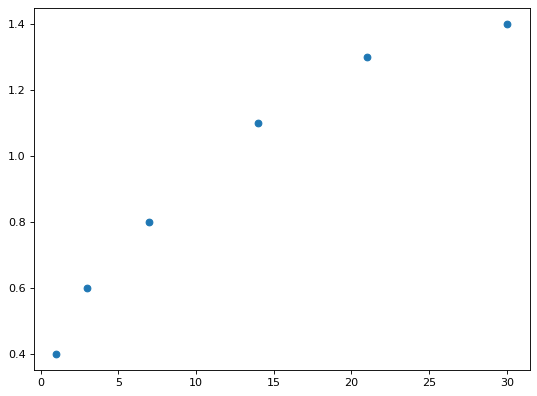

In [57]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df3['day'], df3['cumulative_ARPU'], label="Original Data" )

In [72]:
def log_func(x,a,b):
    return a * np.log( x ) + b
def exp_func( x, a, b):
    return a * b ** x 

In [61]:
from scipy.optimize import curve_fit

In [73]:
log_popt, log_pcov = curve_fit(log_func, df3['day'], df3['cumulative_ARPU'])

In [74]:
exp_popt,par_pcov = curve_fit(exp_func, df3['day'], df3['cumulative_ARPU'])

In [75]:
projection_endpoint = 90

In [76]:
log_y_projected = log_func( np.arange( projection_endpoint ), *log_popt )
exp_y_projected = par_func( np.arange( projection_endpoint ), *exp_popt )

C:\Users\Andrei\AppData\Local\Temp\ipykernel_9440\219207331.py:2: RuntimeWarning: divide by zero encountered in log
  return a * np.log( x ) + b


In [77]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

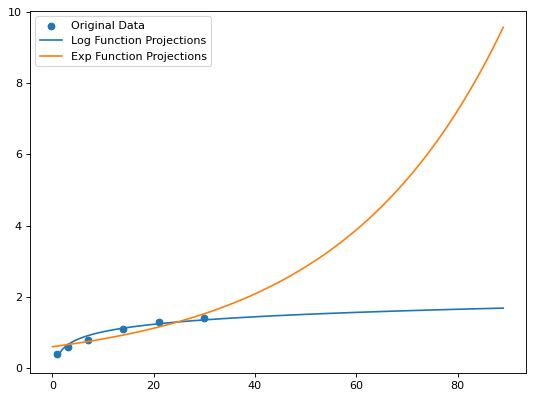

In [79]:
plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(df3['day'], df3['cumulative_ARPU'], label="Original Data" )
plt.plot( log_y_projected, label="Log Function Projections" )
plt.plot( par_y_projected, label="Exp Function Projections" )
plt.legend()
plt.show()

In [80]:
print('Прогноз среднего дохода от пользователя на 90 дней по log модели', round(log_y_projected[89],0))
print('Прогноз среднего дохода от пользователя на 90 дней по exp модели', round(exp_y_projected[89],0))

Прогноз среднего дохода от пользователя на 90 дней по log модели 2.0
Прогноз среднего дохода от пользователя на 90 дней по exp модели 10.0


In [82]:
y_log_pred = [log_y_projected[ i ] for i in list(df3['day'])]
y_log_pred

[0.3182915337381341,
 0.6525362974984633,
 0.9103204822385534,
 1.121205448670408,
 1.2445652459988827,
 1.3530809922778193]

In [84]:
y_exp_pred = [exp_y_projected[ i ] for i in list(df3['day'])]
y_exp_pred

[0.6193285013669545,
 0.659088716032839,
 0.7464307044090908,
 0.9280456295448732,
 1.153849493904676,
 1.5266933282102846]

По виду графиков функции и оригинальным данным логарифмическая функция ближе к реальным данным, соотвественно, для прогнозов лучше использовать именно её.
Так как выборка наблюдений не очень большая, то можно рассматривать логарифмическую функцию как пессимитический прогноз, а возможность экспоненциального роста по графику показательной функции как оптимистичный прогноз.